In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_path = '/Users/keilongwong/Library/CloudStorage/OneDrive-個人/IPM PhD/Thesis/Data/Samsung INR21700 30T 3Ah Li-ion Battery Data'
# data_path = '/Users/keilongwong/Library/CloudStorage/OneDrive-個人/IPM PhD/Thesis/Data/Multi Temperature Li-ion Battery Data - SB LiMotive 5Ah/Data'
# data_path = '/Users/keilongwong/Library/CloudStorage/OneDrive-個人/IPM PhD/Thesis/Data/data from internet/LG 18650HG2 Li-ion Battery Data/LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020'

In [3]:
# loop all csv in data_path and append all rows in one dataframe
df = pd.DataFrame()
for dir in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, dir)):
        for file in os.listdir(os.path.join(data_path, dir)):
            if file.endswith('.csv'):
                file_path = os.path.join(data_path, dir, file)
                # print(file_path)
                time_stamp_line_idx = 0

                with open(file_path) as f:
                    for i, line in enumerate(f):
                        if 'Time Stamp' in line:
                            time_stamp_line_idx = i
                            break
                
                new_df = pd.read_csv(file_path, 
                                     skiprows=time_stamp_line_idx + 2, 
                                     header=None,
                                     index_col=False,
                                     names=['Time Stamp',
                                            'Step',
                                            'Status',
                                            'Prog Time',
                                            'Step Time',
                                            'Cycle',
                                            'Cycle Level',
                                            'Procedure',
                                            'Voltage',
                                            'Current',
                                            'Temperature',
                                            'Capacity',
                                            'WhAccu',
                                            'Cnt'],
                                     )
                
                new_df['Timestamp'] = pd.to_datetime(new_df['Time Stamp']).apply(lambda x: x.timestamp())
                new_df['Exp Temperature'] = dir
                new_df['Cycle Name'] = file[:-4]
                new_df['Exp Name'] = dir + ': ' + file[:-4]
                df = pd.concat([df, new_df])
                
df = df.reset_index(drop=True)

/var/folders/h8/8jpw1q2n08b3k_kml79456t40000gn/T/ipykernel_3644/2884266363.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  new_df = pd.read_csv(file_path,
/var/folders/h8/8jpw1q2n08b3k_kml79456t40000gn/T/ipykernel_3644/2884266363.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  new_df = pd.read_csv(file_path,
/var/folders/h8/8jpw1q2n08b3k_kml79456t40000gn/T/ipykernel_3644/2884266363.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  new_df = pd.read_csv(file_path,
/var/folders/h8/8jpw1q2n08b3k_kml79456t40000gn/T/ipykernel_3644/2884266363.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  new_df = pd.read_csv(file_path,
/var/folders/h8/8jpw1q2n08b3k_kml79456t40000

In [4]:
df.sort_values(by=['Timestamp'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Timestamp,Exp Temperature,Cycle Name,Exp Name
0,2/24/2019 5:19:40 PM,24,DCH,39:01:33.780,00:00:59.999,0,0,Samsung30T_NN_Char,4.17335,-0.15069,38.067390,-0.002530,-0.010570,22.0,1.551029e+09,40degC,697_C20DisCh,40degC: 697_C20DisCh
1,2/24/2019 5:20:40 PM,24,DCH,39:02:33.789,00:02:00.008,0,0,Samsung30T_NN_Char,4.17065,-0.15325,38.172550,-0.005070,-0.021160,22.0,1.551029e+09,40degC,697_C20DisCh,40degC: 697_C20DisCh
2,2/24/2019 5:21:40 PM,24,DCH,39:03:33.786,00:03:00.005,0,0,Samsung30T_NN_Char,4.16795,-0.15069,38.277710,-0.007610,-0.031740,22.0,1.551029e+09,40degC,697_C20DisCh,40degC: 697_C20DisCh
3,2/24/2019 5:22:40 PM,24,DCH,39:04:33.790,00:04:00.009,0,0,Samsung30T_NN_Char,4.16542,-0.15069,38.382860,-0.010140,-0.042300,22.0,1.551029e+09,40degC,697_C20DisCh,40degC: 697_C20DisCh
4,2/24/2019 5:23:40 PM,24,DCH,39:05:33.795,00:05:00.014,0,0,Samsung30T_NN_Char,4.16306,-0.15325,38.382860,-0.012680,-0.052870,22.0,1.551029e+09,40degC,697_C20DisCh,40degC: 697_C20DisCh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646569,7/7/2019 5:50:03 PM,81,PAU,24:01:55.504,00:09:59.106,0,0,Samsung30T_CyclesB,4.015039,0.00000,-19.138853,-0.372429,-1.272347,7.0,1.562522e+09,-20degC,879_PausCycl,-20degC: 879_PausCycl
2646570,7/7/2019 5:50:04 PM,81,PAU,24:01:56.215,00:09:59.817,0,0,Samsung30T_CyclesB,4.015039,0.00000,-19.138853,-0.372429,-1.272347,7.0,1.562522e+09,-20degC,879_PausCycl,-20degC: 879_PausCycl
2646571,7/7/2019 5:50:04 PM,81,PAU,24:01:56.300,00:09:59.902,0,0,Samsung30T_CyclesB,4.015039,0.00000,-19.138853,-0.372429,-1.272347,7.0,1.562522e+09,-20degC,879_PausCycl,-20degC: 879_PausCycl
2646572,7/7/2019 5:50:04 PM,81,PAU,24:01:56.403,00:10:00.005,0,0,Samsung30T_CyclesB,4.015039,0.00000,-19.138853,-0.372429,-1.272347,7.0,1.562522e+09,-20degC,879_PausCycl,-20degC: 879_PausCycl


In [6]:
# plt.plot(df[df['Exp Name'] == '40degC: 722_Mixed4']['Capacity'])

In [7]:
stats = []
for key, group in df.groupby('Exp Name'):
  stats.append((group['Timestamp'].iloc[0], group['Exp Name'].iloc[0]))
stats = pd.DataFrame(stats, columns=['Timestamp', 'Exp Name'])
stats.sort_values(by=['Timestamp'], inplace=True)
stats.to_csv('stats.csv', index=False)

In [8]:
color_code = {
  '40degC': 0,
  '25degC': 1,
  '10degC': 2,
  '0degC': 3,
  '-10degC': 4,
  '-20degC': 5
}

caps = []
for key, group in df.groupby(['Exp Name'], sort=False):
    # if ('1C' not in key) and ('Charge' not in key) and ('0p5c' not in key) and ('2C' not in key):
    #     continue
    if 'Charge' not in key:
        continue
    cap_max = group['Capacity'].abs().max()
    cap_total_trapz = abs(np.trapz(group['Current'].values, group['Timestamp'].values) / 3600)
    if cap_total_trapz < 1 or cap_total_trapz > 5:
        continue
    caps.append((group['Timestamp'].iloc[0], cap_max, cap_total_trapz, color_code[group['Exp Temperature'].iloc[0]]))
caps = np.array(caps)

/var/folders/h8/8jpw1q2n08b3k_kml79456t40000gn/T/ipykernel_3644/1341328728.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df.groupby(['Exp Name'], sort=False):


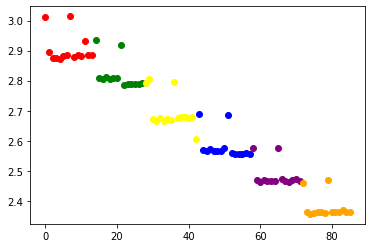

In [9]:
colors = {
  0: 'red',
  1: 'green',
  2: 'yellow',
  3: 'blue',
  4: 'purple',
  5: 'orange'
}

sort_caps = caps[caps[:, 0].argsort()]

for i, cap in enumerate(sort_caps):
    plt.scatter(i, cap[1], color=colors[cap[3]])
# plt.scatter(range(len(sort_caps)), sort_caps[:, 2])

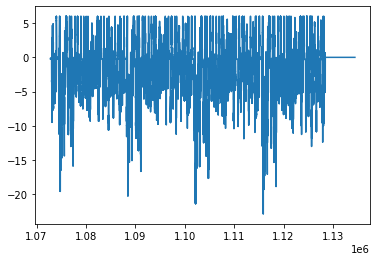

In [10]:
data_plot = df[df['Cycle Name'] == '752_UDDS']

plt.plot(data_plot['Current'])

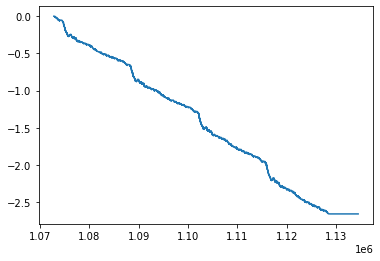

In [11]:
data_plot = df[df['Cycle Name'] == '752_UDDS']

plt.plot(data_plot['Capacity'])

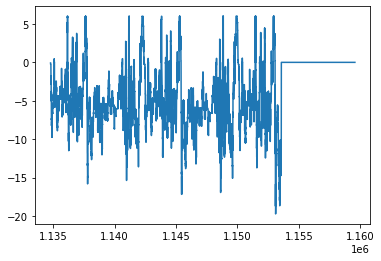

In [12]:
data_plot = df[df['Cycle Name'] == '752_HWFET']

plt.plot(data_plot['Current'])

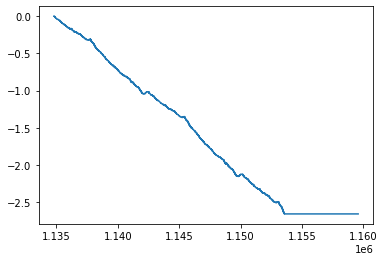

In [13]:
data_plot = df[df['Cycle Name'] == '752_HWFET']

plt.plot(data_plot['Capacity'])

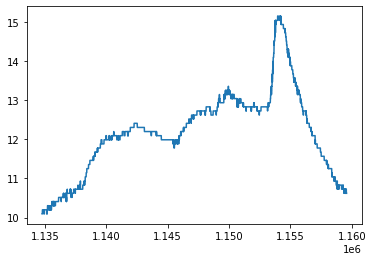

In [14]:
data_plot = df[df['Cycle Name'] == '752_HWFET']

plt.plot(data_plot['Temperature'])